# Clustering algorithms

In [1]:
import warnings

warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

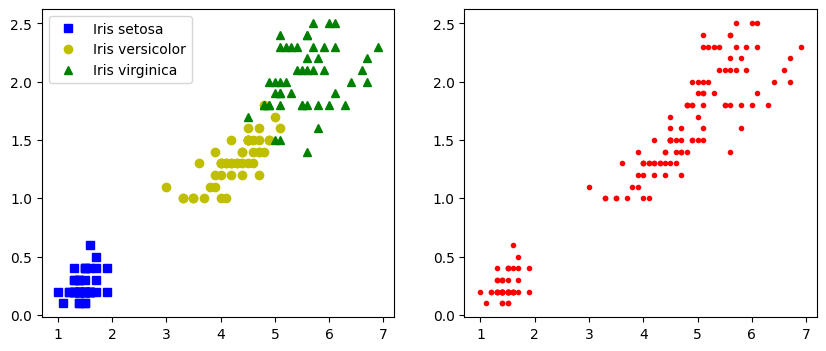

In [3]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "bs", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "yo", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.legend(fontsize=10)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c='red', marker=".")
plt.show()

In [4]:
import numpy as np
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

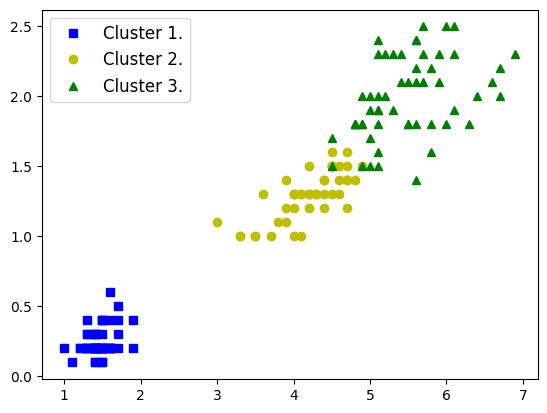

In [5]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "bs", label="Cluster 1.")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "yo", label="Cluster 2.")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3.")
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [6]:
np.sum(y_pred==y) / len(y_pred)  # accuracy

0.9666666666666667

Centroids algorithm

In [7]:
from sklearn.datasets import make_blobs

blobs_centers = np.array([
    [0.3, 2.5],
    [-1.24, 2.32],
    [-2.59, 2.94],
    [-2.99, 1.4],
    [-3, 2.5]
])
blob_std = np.array([0.4, 0.3, 0.1, 0.2, 0.1])

In [8]:
X, y = make_blobs(n_samples=2000, centers=blobs_centers,
                  cluster_std=blob_std, random_state=7)

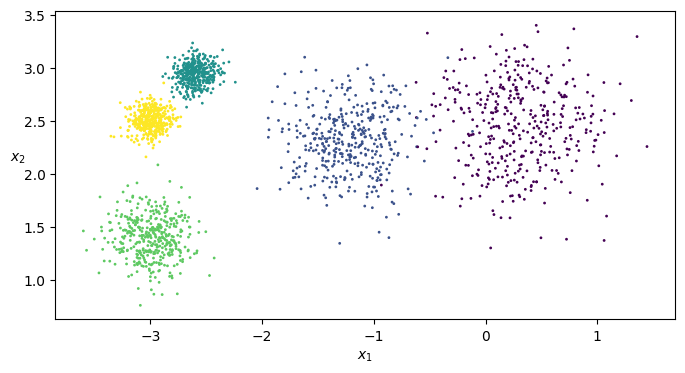

In [9]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$x_2$", fontsize=10, rotation=0)
plt.show()

In [10]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [11]:
y_pred in kmeans.labels_

True

In [12]:
kmeans.cluster_centers_

array([[-1.20480418,  2.30226679],
       [-3.00035275,  2.49942637],
       [ 0.31919766,  2.46048021],
       [-2.99201692,  1.39461528],
       [-2.59066041,  2.93829372]])

In [13]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-2.6, 2.5]])
kmeans.predict(X_new)

array([2, 2, 4, 1], dtype=int32)

Plotting decision boundaries:

In [14]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'g.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=4,
                color=circle_color, zorder=11, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=1, linewidths=8,
                color=cross_color, zorder=20, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=10)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=10, rotation=0)
    else:
        plt.tick_params(labelleft=False)

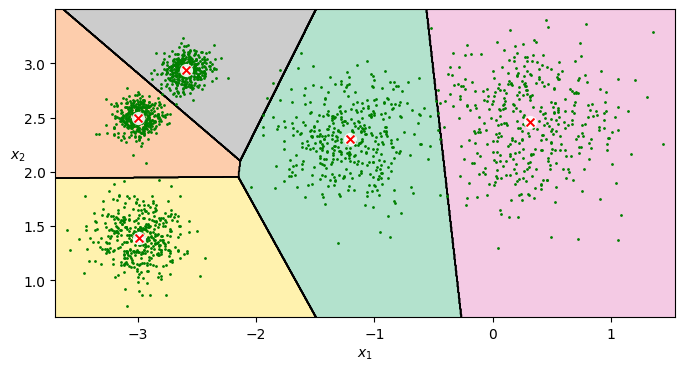

In [15]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [16]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

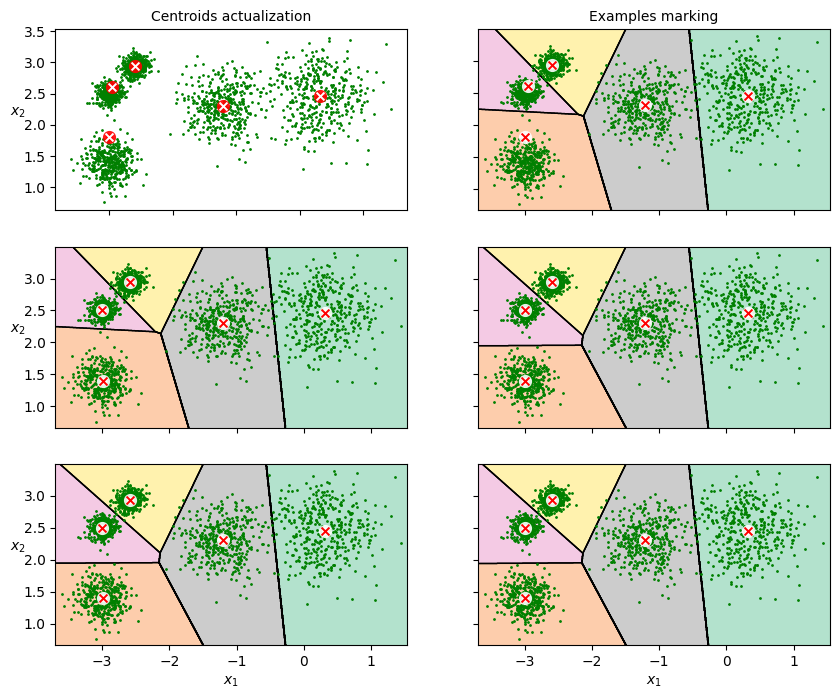

In [17]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=10, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Centroids actualization", fontsize=10)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Examples marking", fontsize=10)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [18]:
print(kmeans.inertia_)  # inertia is a measure of goodness of fit
print(kmeans_iter1.inertia_)

233.56350723380405
306.1041217714153


In [19]:
print(kmeans.score(X))  # score is a measure of target function so it needs to keep the rule: "The more the better"

-233.56350723380405


In [20]:
from sklearn.cluster import MiniBatchKMeans

mini_kmeans = MiniBatchKMeans(n_clusters=5)
mini_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [21]:
print(mini_kmeans.score(X))

-270.20831757634977


In [22]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

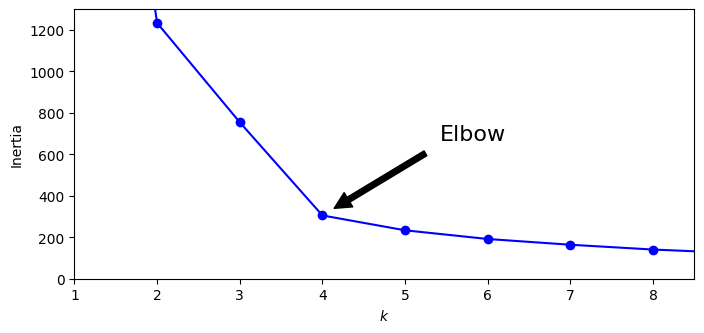

In [23]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=10)
plt.ylabel("Inertia", fontsize=10)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6459087724641313

In [25]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

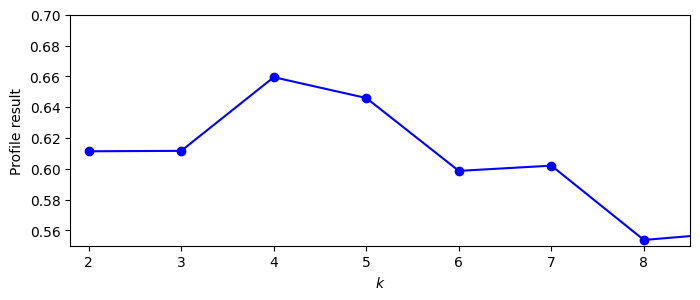

In [26]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=10)
plt.ylabel("Profile result", fontsize=10)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

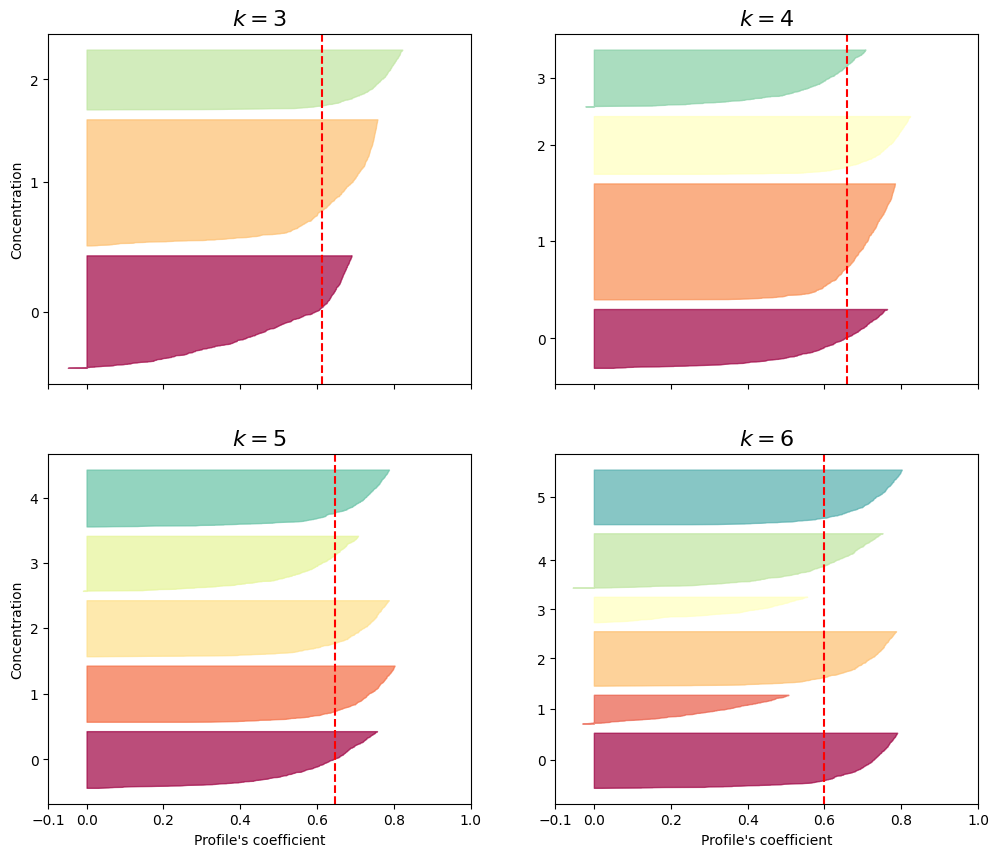

In [27]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(12, 10))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    if k in (3, 5):
        plt.ylabel("Concentration")
    
    if k in (5, 6):
        plt.xlabel("Profile's coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### K-means has its limits:

In [28]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [29]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=10)
    plt.ylabel("$x_2$", fontsize=10, rotation=0)

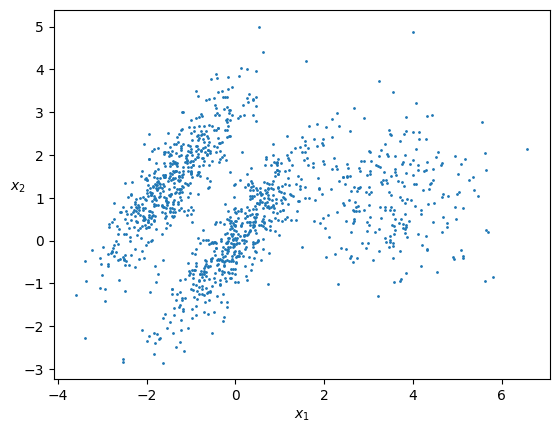

In [30]:
plot_clusters(X)

In [31]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

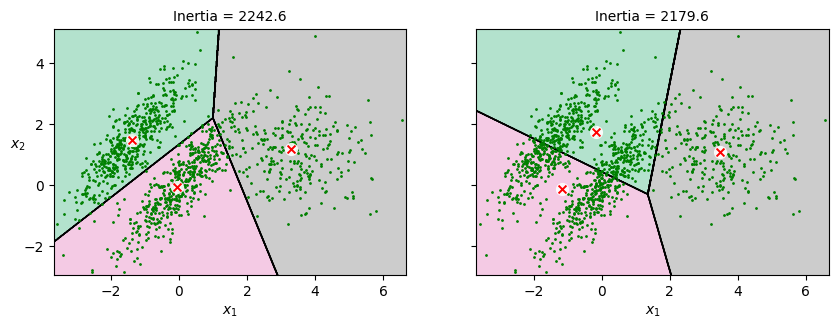

In [32]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=10)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=10)

plt.show()

In [33]:
# MNIST

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression


log_clf = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.9688888888888889

In [35]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [36]:
pipeline.score(X_test, y_test)

0.9733333333333334

In [37]:
print(f"The accuracy was increased by {(1 - (1 - 0.9733333333333334) / (1 - 0.9688888888888889)) * 100:.2f}%.")

The accuracy was increased by 14.29%.


## Semi-supervised learning

In [38]:
n_labeled = k = 50

In [39]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [40]:
kmeans = KMeans(n_clusters=k, random_state=42)  # k is the number of representative images
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

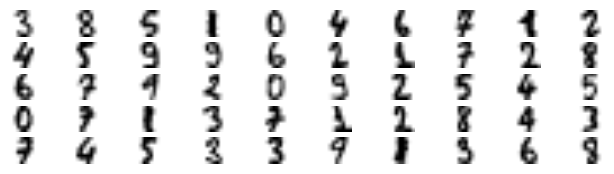

In [41]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [42]:
y_representative_digits = np.array([
    3, 8, 5, 1, 0, 4, 6, 7, 1, 2,
    4, 5, 9, 9, 6, 2, 1, 7, 2, 8,
    6, 7, 9, 2, 0, 9, 2, 5, 4, 5,
    0, 7, 1, 3, 7, 1, 2, 8, 4, 3,
    7, 4, 5, 3, 3, 9, 8, 3, 6, 8])

In [43]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8866666666666667

In [44]:
(0.8866666666666667 - 0.8333333333333334 )/ 0.8333333333333334 * 100

6.400000000000001

In [45]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]  # propagating existing labels on all other examples in a cluster

In [46]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [47]:
log_reg.score(X_test, y_test)

0.9088888888888889

In [48]:
percentile_closest = 20  # propagating to the whole cluster might be too aggresive so let's propagate on 20% of that

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [49]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [50]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [51]:
log_reg.score(X_test, y_test)

0.92

In [52]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])  # what part of labels are correctly assigned

0.9652777777777778

### DBSCAN algorithm

In [53]:
from sklearn.datasets import make_moons

X, y = make_moons(1000, noise=0.04, random_state=42)

In [54]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [55]:
dbscan.labels_[:10]

array([ 0,  1, -1, -1,  2,  1,  1,  0,  1,  2])

In [56]:
len(dbscan.core_sample_indices_)

865

In [57]:
dbscan.core_sample_indices_[:10]

array([ 0,  1,  4,  5,  6,  7,  8, 10, 11, 12])

In [58]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [59]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=10)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=10, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=10)

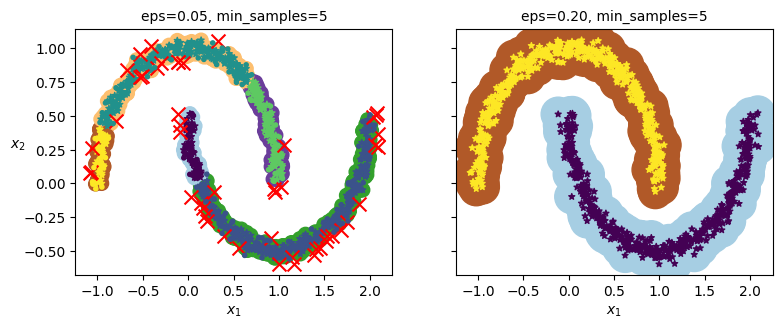

In [60]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [61]:
dbscan = dbscan2

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [63]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [64]:
knn.predict_proba(X_new)

array([[0.16, 0.84],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

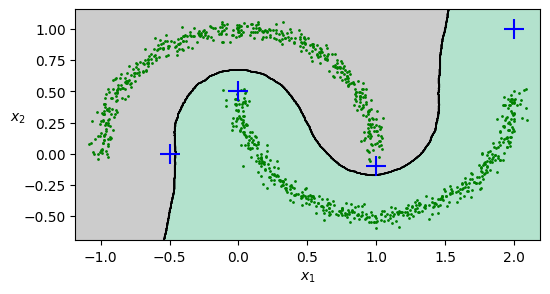

In [65]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [66]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

### Spectral clustering

In [67]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [68]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [69]:
np.percentile(sc1.affinity_matrix_, 95)

0.052416404598659525

In [70]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=10)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=10, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=10)

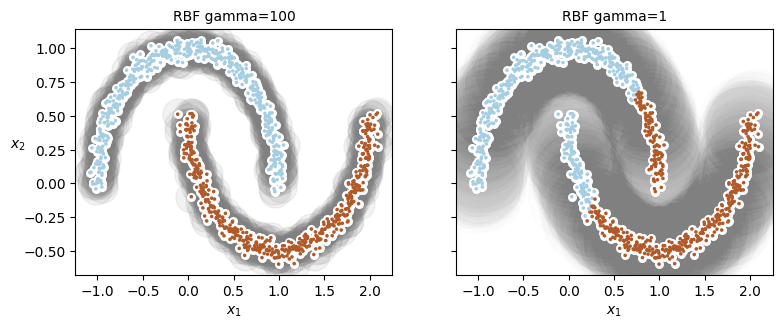

In [71]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### Aglomerative clustering

In [72]:
from sklearn.cluster import AgglomerativeClustering


X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)

agg_clust = AgglomerativeClustering(linkage="complete").fit(X)

In [73]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [74]:
learned_parameters(agg_clust)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [75]:
agg_clust.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

### Gaussian mixture

In [76]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [77]:
from sklearn.mixture import GaussianMixture

gauss_mix = GaussianMixture(n_components=3, n_init=10, random_state=42)
gauss_mix.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [78]:
gauss_mix.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [79]:
gauss_mix.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [80]:
gauss_mix.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [81]:
gauss_mix.converged_

True

In [82]:
gauss_mix.n_iter_

4

In [83]:
gauss_mix.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [84]:
gauss_mix.predict_proba(X)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]])

In [85]:
X_new, y_new = gauss_mix.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [86]:
gauss_mix.score_samples(X_new)  # estimated PDF function

array([-3.32995121, -2.01519091, -3.91419339, -3.70298194, -3.66142322,
       -3.82887849])

In [87]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gauss_mix.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()  # we are checking if the integral of PDF is correct - 1.0

0.9999999999225088

In [88]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=10)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=10, rotation=0)
    else:
        plt.tick_params(labelleft=False)

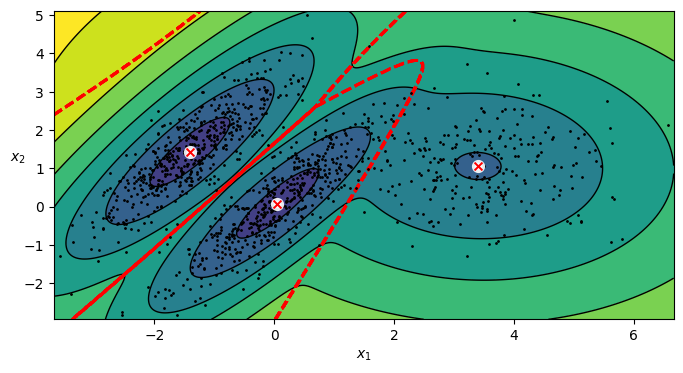

In [89]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gauss_mix, X)

plt.show()

In [90]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [91]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=10)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=10)

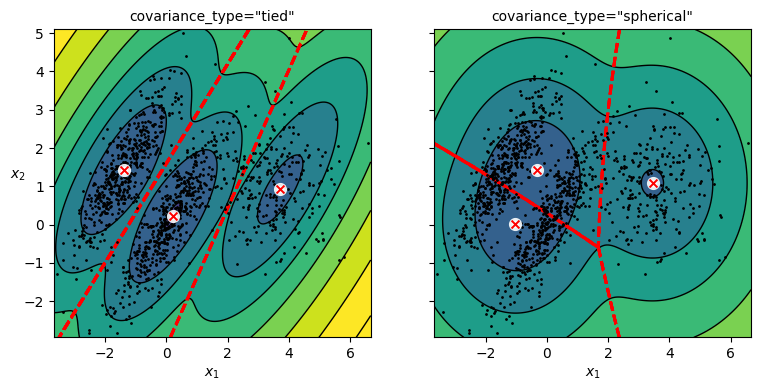

In [92]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

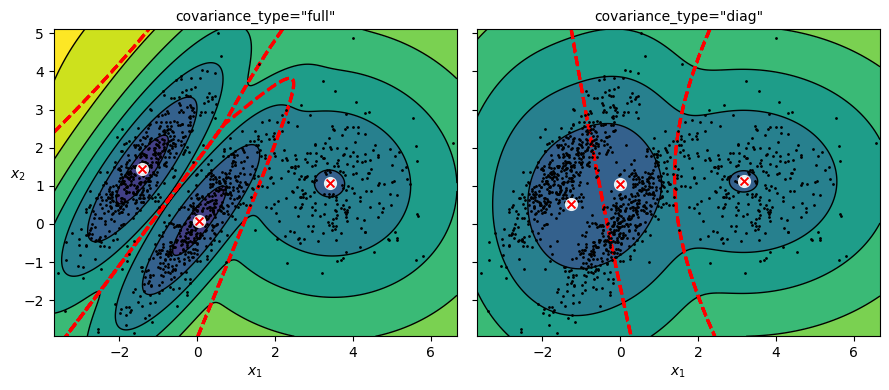

In [93]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

Gaussian mixtures can be used in anomaly detection.

In [94]:
densities = gauss_mix.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

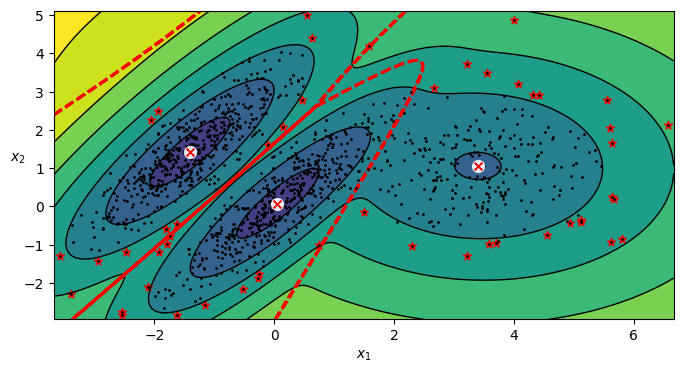

In [95]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gauss_mix, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

BIC - Bayesian Information Criterion:
${BIC} = {\log(m)p - 2\log({\hat L})}$

AIC - Akaike Information Criterion: 
${AIC} = 2p - 2\log(\hat L)$

where:
* $m$ is number of examples.
* $p$ is number of parameters learned by the model.
* $\hat L$ is maksimum number of the target likelihood function. It is the conditional probability of the observed data $\mathbf{X}$ for a given model and its optimizied parameters.


In [96]:
gauss_mix.aic(X)

8102.508425106598

In [97]:
gauss_mix.bic(X)

8189.733705221636

In [98]:
# BIC and AIC by hand:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gauss_mix.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(aic, bic)

8102.508425106598 8189.733705221636


In [99]:
n_params

17

In [100]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [101]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

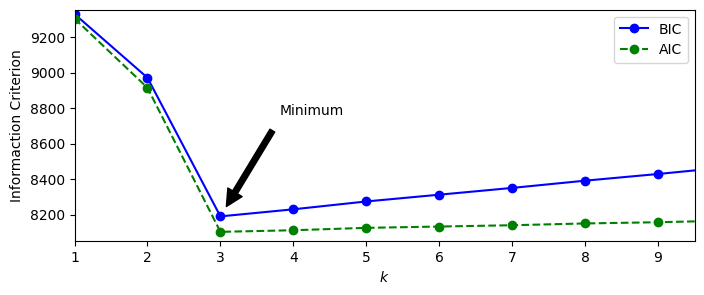

In [102]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=10)
plt.ylabel("Informaction Criterion", fontsize=10)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=10,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [103]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [104]:
best_k

3

In [105]:
best_covariance_type

'full'

Variatonal Gaussian Mixtures

In [106]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [107]:
np.round(bgm.weights_, 2)  # 3 main components

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

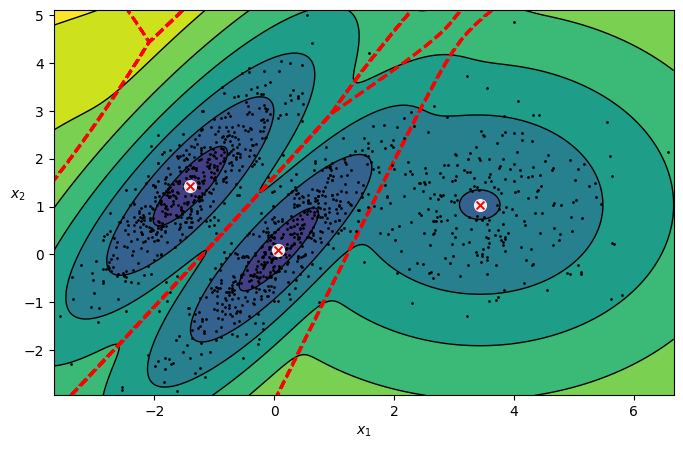

In [108]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [109]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [110]:
np.round(bgm_low.weights_, 2)

array([0.25, 0.26, 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [111]:
np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.37, 0.01, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01])

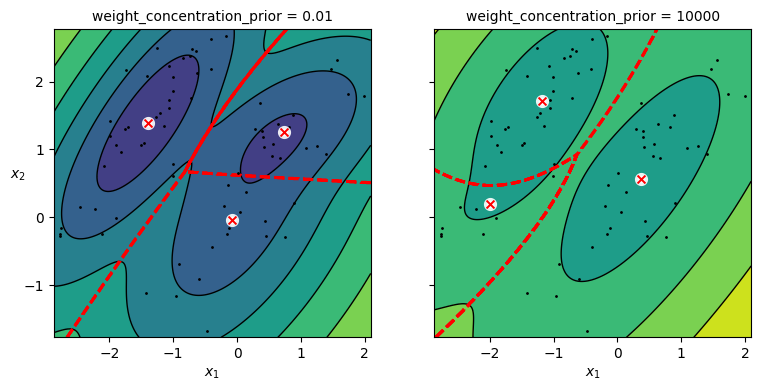

In [112]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=10)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=10)
plt.show()

In [113]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [114]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

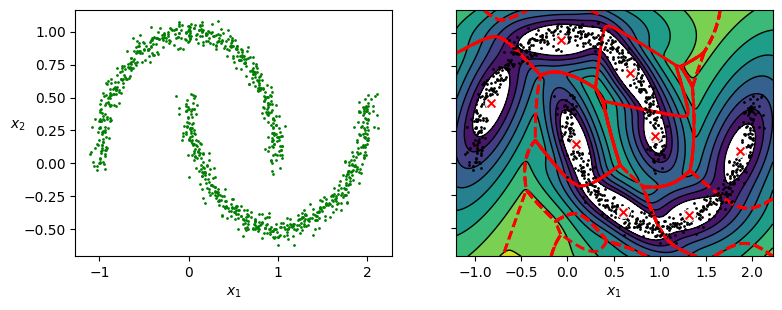

In [115]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$x_2$", fontsize=10, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

In [116]:
from scipy.stats import norm

In [117]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])

Text(0.5, 1.0, '$\\log \\, \\mathcal{L}(\\theta|x=2.5)$')

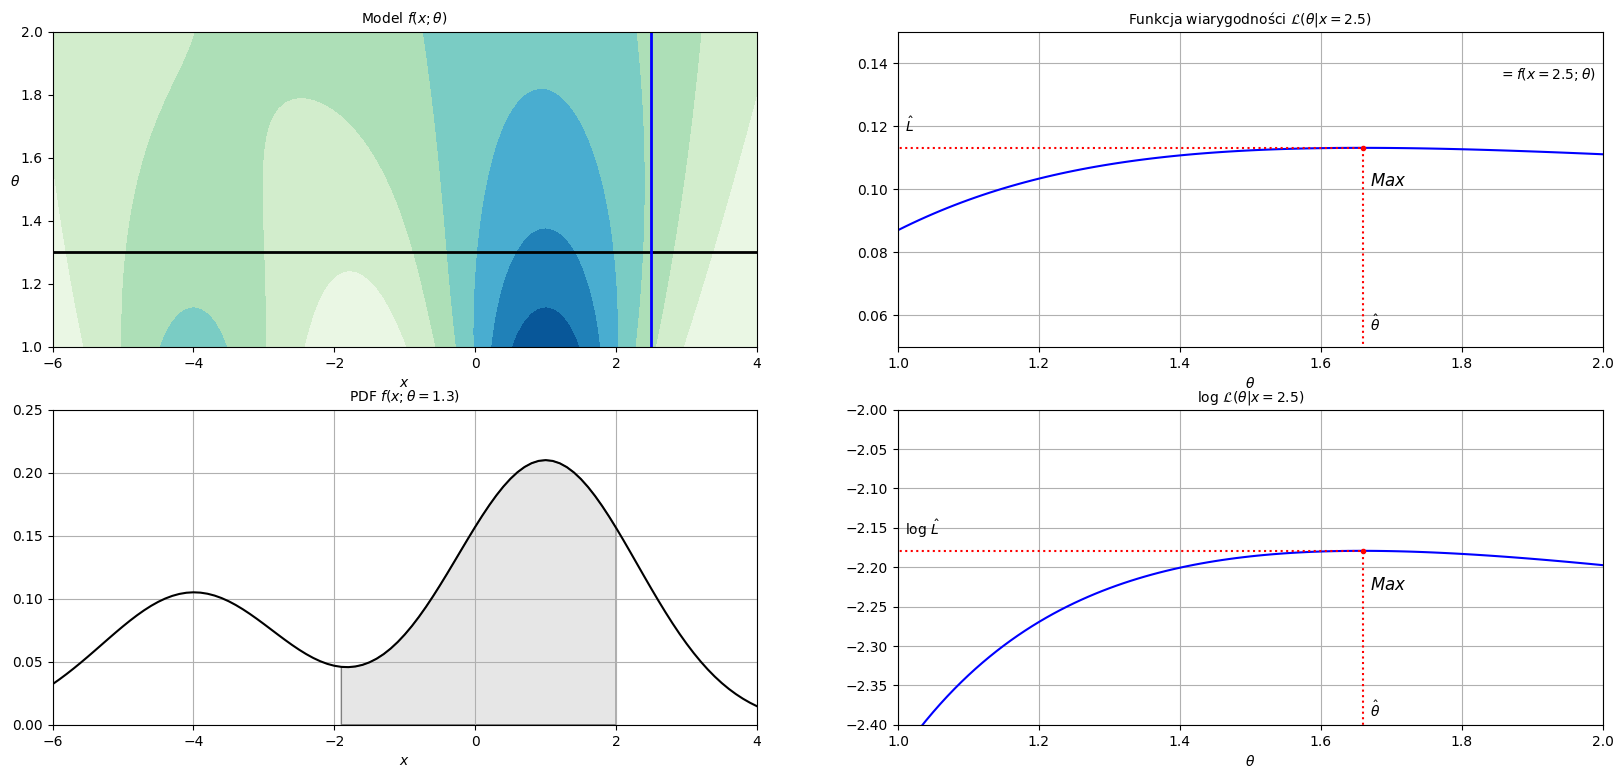

In [118]:
from matplotlib.patches import Polygon

plt.figure(figsize=(20, 9))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=10, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=10)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=10)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=10)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=10)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=10, ha="right")
plt.title(r"Funkcja wiarygodności $\mathcal{L}(\theta|x=2.5)$", fontsize=10)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=10)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=10)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=10)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=10)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=10)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=10)

In [156]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [157]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [158]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [159]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid, y_train_valid = olivetti.data[train_valid_idx], olivetti.target[train_valid_idx]  # splitting into training-validation and test sets
X_test, y_test = olivetti.data[test_idx], olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))  # splitting into train and valid sets
X_train, y_train = X_train_valid[train_idx], y_train_valid[train_idx]
X_valid, y_valid = X_train_valid[valid_idx], y_train_valid[valid_idx]

In [160]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [161]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)  # fit and transform on training set,
X_valid_pca = pca.transform(X_valid)  # then transform on validation set...
X_test_pca = pca.transform(X_test)  # and test dataset

pca.n_components_

199

In [162]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


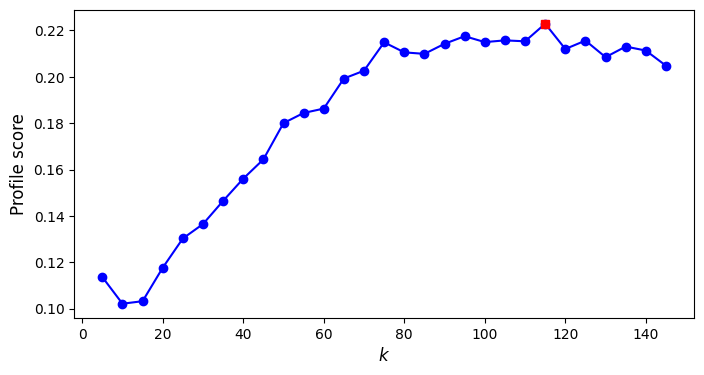

In [163]:
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Profile score", fontsize=12)
plt.plot(best_k, best_score, "rs")
plt.show()

In [164]:
best_k

115

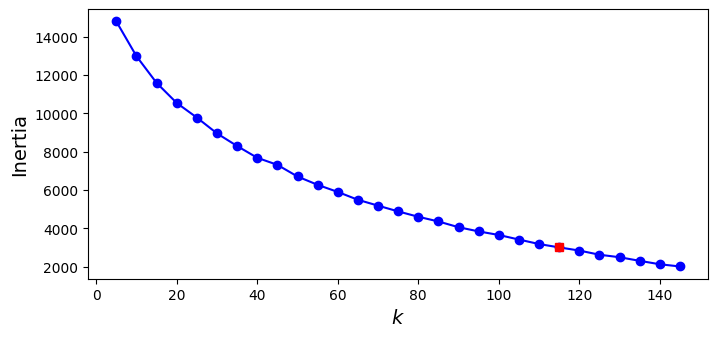

In [165]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()  # we can't really use the elbow method here, so let's use the 115 best_k

In [166]:
best_model = kmeans_per_k[best_index]

Cluster no.: 0


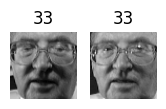

Cluster no.: 1


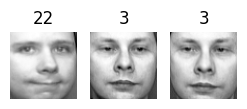

Cluster no.: 2


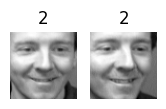

Cluster no.: 3


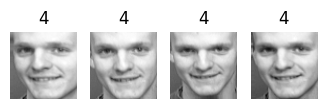

Cluster no.: 4


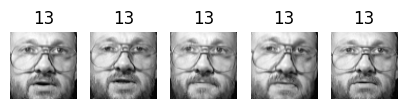

Cluster no.: 5


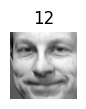

Cluster no.: 6


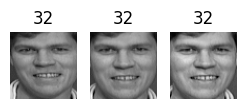

Cluster no.: 7


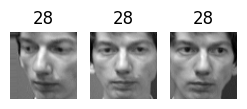

Cluster no.: 8


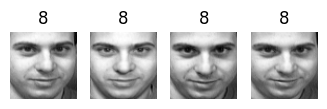

Cluster no.: 9


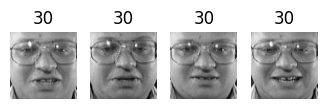

Cluster no.: 10


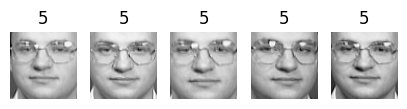

Cluster no.: 11


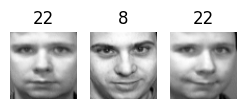

Cluster no.: 12


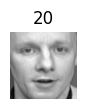

Cluster no.: 13


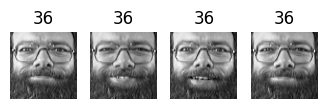

Cluster no.: 14


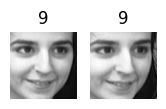

Cluster no.: 15


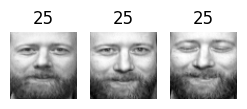

Cluster no.: 16


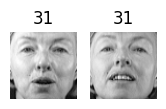

Cluster no.: 17


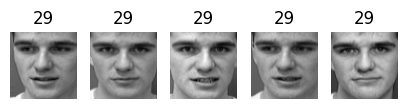

Cluster no.: 18


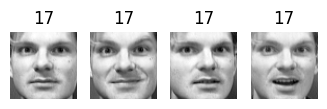

Cluster no.: 19


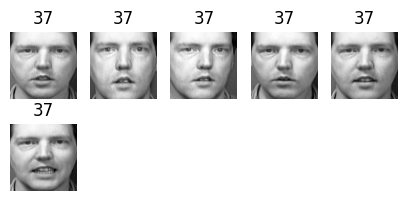

Cluster no.: 20


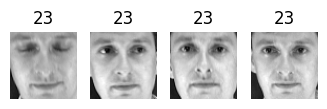

Cluster no.: 21


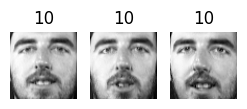

Cluster no.: 22


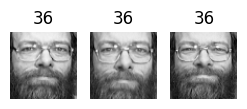

Cluster no.: 23


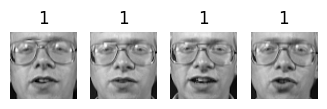

Cluster no.: 24


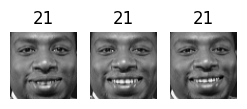

Cluster no.: 25


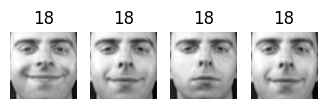

Cluster no.: 26


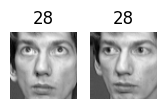

Cluster no.: 27


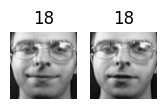

Cluster no.: 28


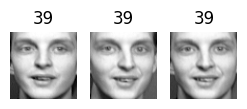

Cluster no.: 29


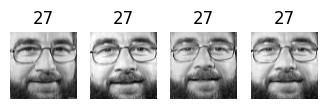

Cluster no.: 30


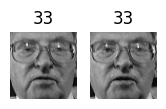

Cluster no.: 31


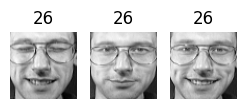

Cluster no.: 32


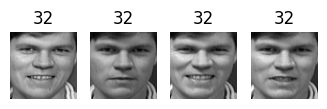

Cluster no.: 33


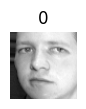

Cluster no.: 34


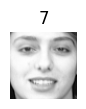

Cluster no.: 35


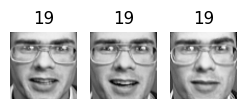

Cluster no.: 36


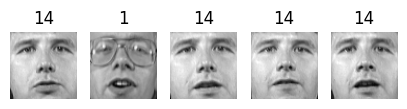

Cluster no.: 37


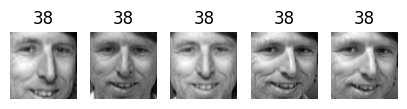

Cluster no.: 38


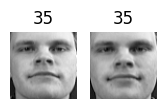

Cluster no.: 39


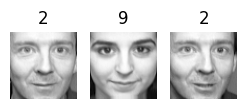

Cluster no.: 40


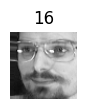

Cluster no.: 41


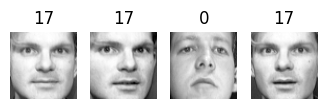

Cluster no.: 42


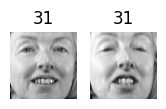

Cluster no.: 43


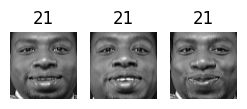

Cluster no.: 44


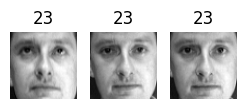

Cluster no.: 45


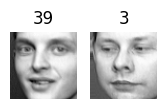

Cluster no.: 46


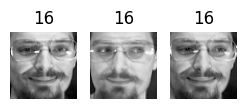

Cluster no.: 47


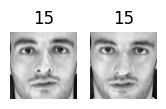

Cluster no.: 48


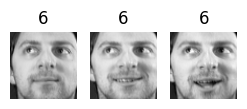

Cluster no.: 49


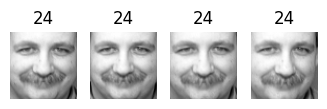

Cluster no.: 50


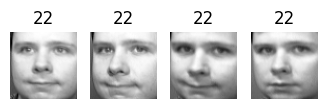

Cluster no.: 51


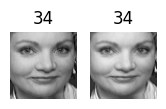

Cluster no.: 52


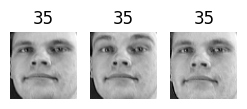

Cluster no.: 53


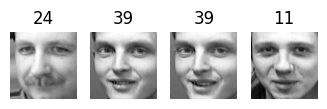

Cluster no.: 54


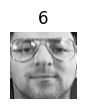

Cluster no.: 55


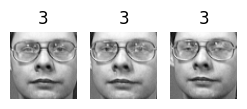

Cluster no.: 56


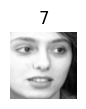

Cluster no.: 57


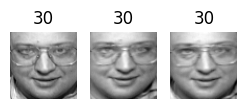

Cluster no.: 58


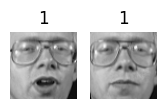

Cluster no.: 59


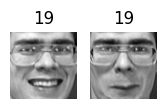

Cluster no.: 60


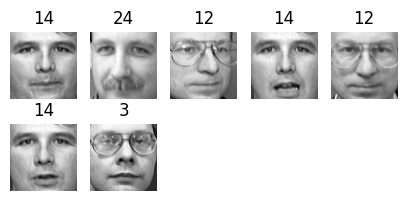

Cluster no.: 61


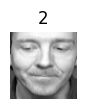

Cluster no.: 62


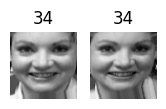

Cluster no.: 63


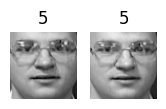

Cluster no.: 64


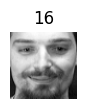

Cluster no.: 65


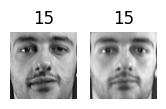

Cluster no.: 66


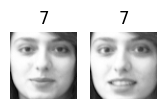

Cluster no.: 67


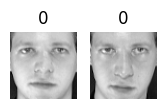

Cluster no.: 68


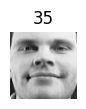

Cluster no.: 69


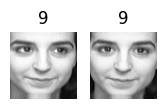

Cluster no.: 70


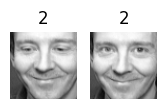

Cluster no.: 71


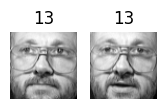

Cluster no.: 72


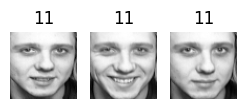

Cluster no.: 73


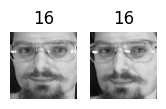

Cluster no.: 74


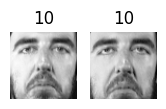

Cluster no.: 75


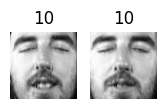

Cluster no.: 76


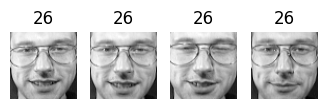

Cluster no.: 77


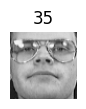

Cluster no.: 78


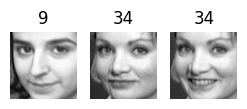

Cluster no.: 79


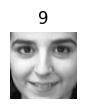

Cluster no.: 80


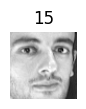

Cluster no.: 81


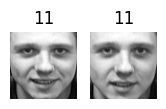

Cluster no.: 82


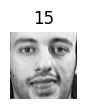

Cluster no.: 83


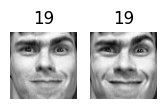

Cluster no.: 84


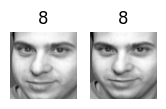

Cluster no.: 85


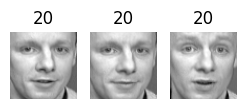

Cluster no.: 86


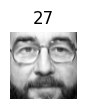

Cluster no.: 87


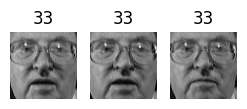

Cluster no.: 88


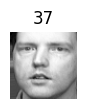

Cluster no.: 89


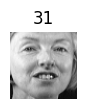

Cluster no.: 90


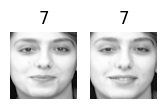

Cluster no.: 91


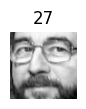

Cluster no.: 92


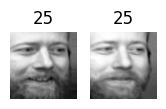

Cluster no.: 93


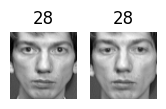

Cluster no.: 94


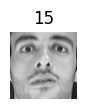

Cluster no.: 95


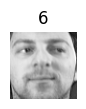

Cluster no.: 96


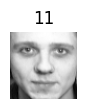

Cluster no.: 97


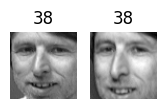

Cluster no.: 98


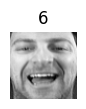

Cluster no.: 99


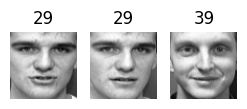

Cluster no.: 100


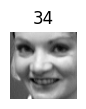

Cluster no.: 101


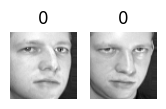

Cluster no.: 102


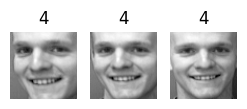

Cluster no.: 103


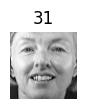

Cluster no.: 104


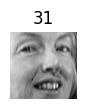

Cluster no.: 105


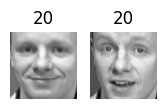

Cluster no.: 106


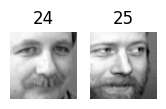

Cluster no.: 107


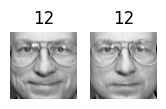

Cluster no.: 108


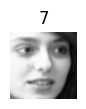

Cluster no.: 109


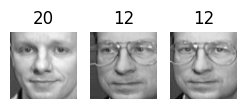

Cluster no.: 110


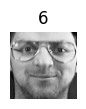

Cluster no.: 111


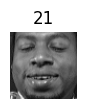

Cluster no.: 112


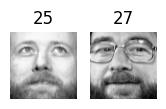

Cluster no.: 113


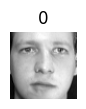

Cluster no.: 114


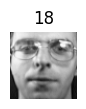

In [167]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster no.:", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [168]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9

In [171]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.7125

In [172]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=n_clusters)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3375
10 0.525
15 0.55
20 0.6
25 0.65
30 0.7125
35 0.675
40 0.725
45 0.725
50 0.7625
55 0.7125
60 0.7125
65 0.725
70 0.7
75 0.75
80 0.7375
85 0.775
90 0.725
95 0.7625
100 0.7
105 0.75
110 0.775
115 0.725
120 0.7625
125 0.725
130 0.75
135 0.75
140 0.725
145 0.7625


Well, the centroids clustering algorithm doesn't help in this case.

In [173]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [174]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8375

Even after adding features from the reduced dataset, to the original features, the score is not satisfactory.

### Gaussian mixtures for Olivetti faces

In [175]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [176]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

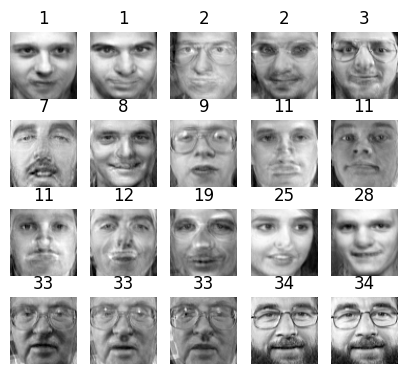

In [177]:
plot_faces(gen_faces, y_gen_faces)

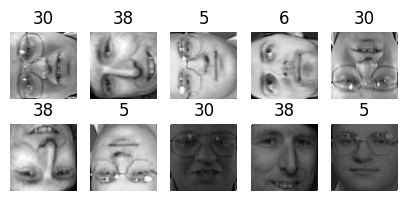

In [178]:
# data augmentation and anomalies creation
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [179]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [180]:
gm.score_samples(X_bad_faces_pca)  # the gaussian mixture scores bad faces vastly differently

array([-1.85962792e+07, -1.73014291e+07, -4.15206895e+07, -4.81260400e+07,
       -3.20479281e+07, -1.35426113e+07, -2.92374351e+07, -9.25151750e+07,
       -1.03272588e+08, -5.41696791e+07])

In [181]:
gm.score_samples(X_train_pca[:10])

array([1163.02020912, 1112.17307258, 1156.32132889, 1170.67602667,
       1073.6924606 , 1139.89252622, 1113.76629792, 1073.6924482 ,
       1048.17522609, 1048.17520492])

In [182]:
X_train_pca

array([[ 3.7808337e+00, -1.8548032e+00, -5.1440210e+00, ...,
        -1.3563201e-01, -2.1408656e-01,  6.1181337e-02],
       [ 1.0148835e+01, -1.5275414e+00, -7.6703024e-01, ...,
         1.2393300e-01, -1.3526677e-01, -2.3262165e-02],
       [-1.0015296e+01,  2.8772802e+00, -9.1988897e-01, ...,
         7.2604068e-02, -2.9649085e-03,  1.2488674e-01],
       ...,
       [ 2.4758658e+00,  2.9559784e+00,  1.2998500e+00, ...,
        -2.0904409e-02,  3.4853429e-02, -1.5432942e-01],
       [-3.2203152e+00,  5.3489828e+00,  1.3942585e+00, ...,
         5.7547756e-02, -2.2831307e-01,  1.5556443e-01],
       [-9.2287707e-01, -3.6470258e+00,  2.2608876e+00, ...,
         1.3684857e-01, -6.9132693e-02,  6.2692098e-02]], dtype=float32)

In [183]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [189]:
reconstruction_errors(pca, X_train).mean() * 100

0.019205348507966846

In [190]:
reconstruction_errors(pca, X_bad_faces).mean() * 100

0.47073541209101677

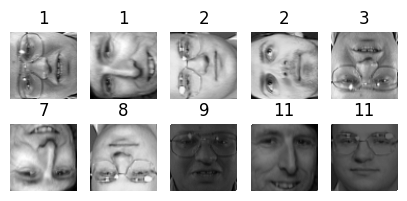

In [186]:
plot_faces(X_bad_faces, y_gen_faces)

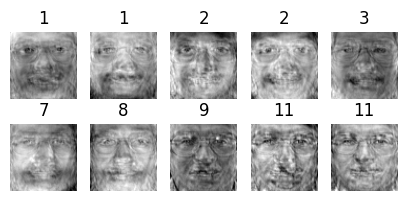

In [187]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces)